## Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## Read data from file csv

In [39]:
data = pd.read_csv('Data/BonBanh.csv')
data

,Tên xe,Năm sản xuất,Tình trạng,Số km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Màu ngoại thất,Màu nội thất,Dẫn động,Số chỗ ngồi,Giá xe
0,Xe Peugeot 2008 Active 1.2 AT,2022,Xe đã dùng,"30,000 Km",Lắp ráp trong nước,Crossover,Số tự động,Xăng 1.2 L,Đỏ,Đen,FWD - Dẫn động cầu trước,5 chỗ,679 Triệu
1,Xe Mercedes Benz C class C300 AMG,2014,Xe đã dùng,"90,000 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 3.0 L,Trắng,Đen,RFD - Dẫn động cầu sau,5 chỗ,499 Triệu
2,Xe Mercedes Benz E class E200 Exclusive,2022,Xe đã dùng,500 Km,Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Đen,Nâu,RFD - Dẫn động cầu sau,5 chỗ,2 Tỷ 229 Triệu
3,Xe Mercedes Benz C class C200 Avantgarde,2021,Xe đã dùng,80 Km,Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Xanh,Nâu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 399 Triệu
4,Xe Mercedes Benz E class E200 Exclusive,2022,Xe đã dùng,"8,888 Km",Lắp ráp trong nước,Sedan,Số tự động,Xăng 2.0 L,Trắng,Nâu,RFD - Dẫn động cầu sau,5 chỗ,1 Tỷ 788 Triệu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,Xe Kia Morning LX 1.0 AT,2009,Xe đã dùng,"1,111 Km",Nhập khẩu,Hatchback,Số tự động,Xăng 1.0 L,Bạc,Kem,FWD - Dẫn động cầu trước,5 chỗ,158 Triệu
18359,Xe Hyundai Accent 1.4 MT,2018,Xe đã dùng,"80,000 Km",Lắp ráp trong nước,Sedan,Số tay,Xăng 1.4 L,Trắng,Kem,FWD - Dẫn động cầu trước,5 chỗ,328 Triệu
18360,Xe Toyota Vios G 1.5 CVT,2023,Xe mới,Xe mới,Lắp ráp trong nước,Sedan,Số tự động,Xăng 1.5 L,Trắng,Đen,FWD - Dẫn động cầu trước,5 chỗ,592 Triệu
18361,Xe Mitsubishi Attrage 1.2 CVT,2023,Xe mới,Xe mới,Nhập khẩu,Sedan,Số tự động,Xăng 1.2 L,Xám,Đen,FWD - Dẫn động cầu trước,5 chỗ,465 Triệu


## Preprocessing

#### Change value *Xe mới* in into *0 km* and remove *km* in other values in **Số km đã đi** column

In [40]:
data['Số km đã đi'] = data['Số km đã đi'].replace('Xe mới', '0 Km')
data['Số km đã đi'] = data['Số km đã đi'].str.replace('Km', '')
def change_to_int(so_km):
    km = 0
    so_km = [int(x) for x in so_km.split(',')]
    n = len(so_km)
    for i in range(n):
        km += 1000**(n-i-1)*so_km[i] 
    return km
data['Số km đã đi'] = data['Số km đã đi'].apply(change_to_int)
data['Số km đã đi'] = data['Số km đã đi'].astype('int64')

#### Split **Tên xe** column into **Hãng xe** column and **Dòng xe** column

In [41]:
data['Tên xe'] = data['Tên xe'].str.replace('Xe ', '')
check =  lambda x : ' '.join(x.split()[:1]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[:2])
cartype = data['Tên xe'].apply(check)
data['Hãng xe'] = cartype

In [42]:
#remove 2 first words from Tên xe column if the first word is not Merceides else take 1 word
data['Tên xe'] = data['Tên xe'].apply(lambda x : ' '.join(x.split()[1:]) if x.split()[0] != "Mercedes" else ' '.join(x.split()[2:]))

In [43]:
classcheck = lambda x: '-' if x == '' else (' '.join(x.split()[:2]) if (x.split()[0] == "4" or x.split()[0]=="Range Rover" or x.split()[0]=="Lux" or x.split()[0]== "Range" ) else ' '.join(x.split()[:1]))
series = data['Tên xe'].apply(classcheck)
data['Series'] = series

In [44]:
data = data.drop('Tên xe', axis=1)

#### Split **Động cơ** column into **Dung tích** column and **Loại nhiên liệu** column

In [45]:
data['Dung tích'] = data['Động cơ'].str.extract(r'(\d\.\d)')
data['Dung tích'] = data['Dung tích'].fillna(0)
data['Dung tích'] = data['Dung tích'].astype('float64')

In [46]:
data['Loại nhiên liệu'] = data['Động cơ'].str.extract(r'(Xăng|Dầu|Hybrid|Điện)')

In [47]:
data = data.drop('Động cơ', axis=1)

#### Remove *Chỗ* in all values in **Số chỗ ngồi** column

In [48]:
data['Số chỗ ngồi'] = data['Số chỗ ngồi'].str.replace('chỗ', '')
data['Số chỗ ngồi'] = data['Số chỗ ngồi'].astype('int64')
data['Số chỗ ngồi'] = data['Số chỗ ngồi'].replace(0, np.nan)

#### Take the first word in all value **Dẫn động**

In [49]:
data['Dẫn động'] = data['Dẫn động'].apply(lambda x: x.split()[0])

#### Change value in **Giá xe** column into *Triệu* unit

In [50]:
def convert_price(price):
    price = price.split(" ")
    if len(price) == 4:
        return int(price[0])*1000 + int(price[2])
    else:
        if price[-1] == 'Tỷ':
            return int(price[0]) * 1000
        else:
            return int(price[0])
data['Giá xe'] = data['Giá xe'].apply(convert_price)

#### Change value *-* into null

In [51]:
for col in data:
    data[col] = data[col].replace('-', np.nan)

#### Take the target and features

In [52]:
target = data['Giá xe']
feature = data.drop('Giá xe', axis=1)

#### Drop unnecessary column

In [53]:
feature = feature.drop('Series', axis=1)
feature = feature.drop('Dung tích', axis=1)
#feature = feature.drop('Tình trạng', axis=1)

## Exploratory and Data Analynist

#### Handle missing value

In [54]:
for col in feature:
    if feature[col].isnull().sum() > 0:
        print(col , feature[col].isnull().sum())

Hộp số 7
Màu ngoại thất 22
Màu nội thất 477
Dẫn động 9
Số chỗ ngồi 3
Loại nhiên liệu 5


In [55]:
for col in ['Hộp số', 'Màu ngoại thất', 'Dẫn động', 'Số chỗ ngồi', 'Loại nhiên liệu']:
    if feature[col].isnull().sum() != 0:
        feature[col] = feature[col].fillna(feature[col].mode()[0])

In [56]:
feature['Màu nội thất'] = feature['Màu nội thất'].fillna('Khác')

#### Split the type of columns

In [57]:
feature.nunique()

Năm sản xuất         35
Tình trạng            2
Số km đã đi        1054
Xuất xứ               2
Kiểu dáng            10
Hộp số                3
Màu ngoại thất       17
Màu nội thất         17
Dẫn động              4
Số chỗ ngồi          18
Hãng xe              68
Loại nhiên liệu       4
dtype: int64

In [58]:
str_numerical_cols = []
not_str_numerical_cols = []
categorical_cols = []
for col in feature.columns:
    if len(feature[col].unique()) < 6:
        categorical_cols.append(col)
    else:
        if feature[col].dtypes == 'object':
            str_numerical_cols.append(col)
        else:
            not_str_numerical_cols.append(col)
print(str_numerical_cols)
print(not_str_numerical_cols)
print(categorical_cols)

['Kiểu dáng', 'Màu ngoại thất', 'Màu nội thất', 'Hãng xe']
['Năm sản xuất', 'Số km đã đi', 'Số chỗ ngồi']
['Tình trạng', 'Xuất xứ', 'Hộp số', 'Dẫn động', 'Loại nhiên liệu']


#### Handle outliers

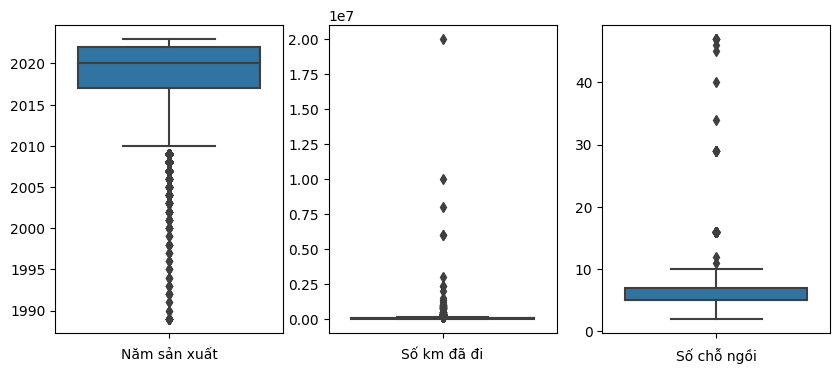

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
for i in range(len(not_str_numerical_cols)):
    col = not_str_numerical_cols[i]
    sns.boxplot(y=feature[col], ax=axes[i])
for i in range(len(not_str_numerical_cols)):
    axes[i].set_xlabel(not_str_numerical_cols[i])
    axes[i].set_ylabel("")
plt.show()

In [60]:
feature['Số km đã đi'] = feature['Số km đã đi'].apply(lambda x: x if x < 200000 else 200000)
feature['Năm sản xuất'] = feature['Năm sản xuất'].apply(lambda x: x if x > 2010 else 2010)
feature['Số chỗ ngồi'] = feature['Số chỗ ngồi'].apply(lambda x: x if x < 10 else 10)

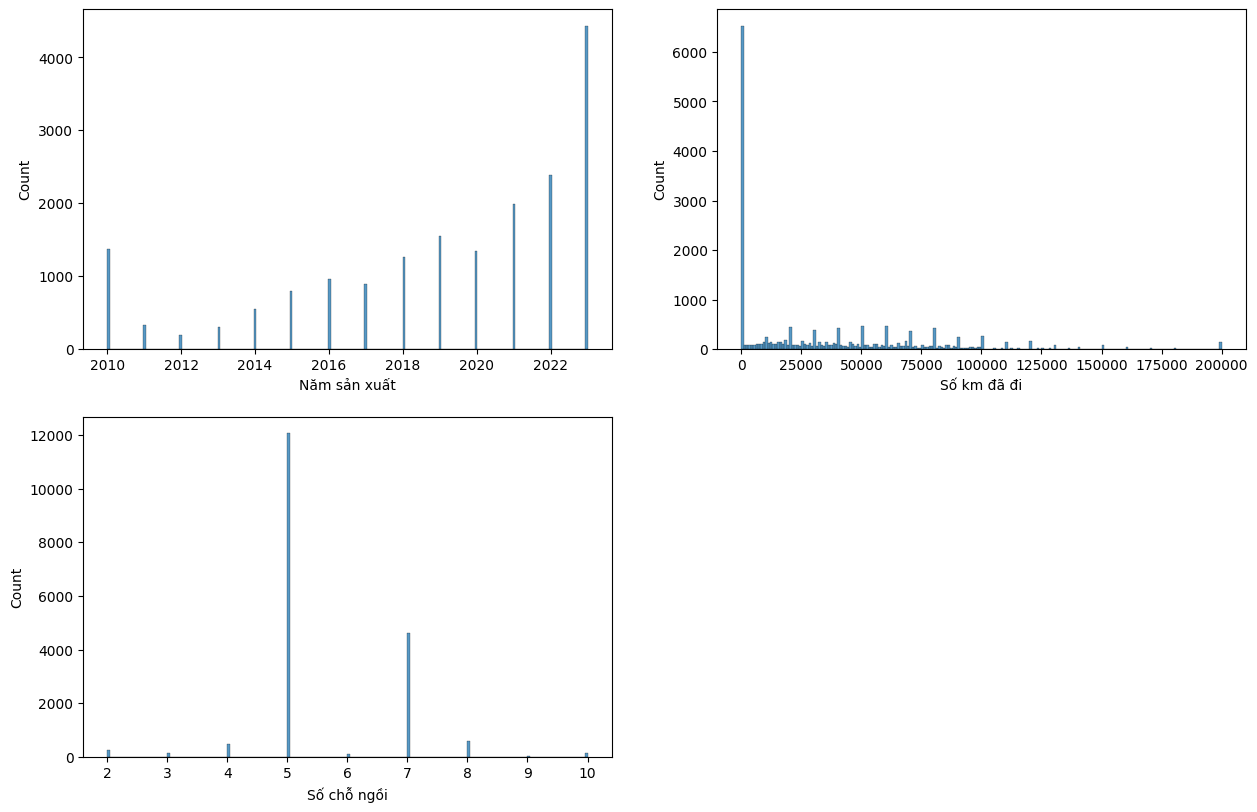

In [61]:
plt.figure(figsize=(15,15))
for i,col in enumerate(not_str_numerical_cols):
    plt.subplot(3,2,i+1)
    sns.histplot(feature[col], bins=200)
    plt.plot()

#### Change all values in string numerical columns that the percent of the number of this value < 5% to *Khác*

In [62]:
def change_to_others(col):
    percent = feature[col].value_counts(normalize=True)
    return np.where(percent[feature[col]].values < 0.05, 'Khác', feature[col])
for col in str_numerical_cols:
    feature[col] = change_to_others(col)

#### Plot all string numerical columns

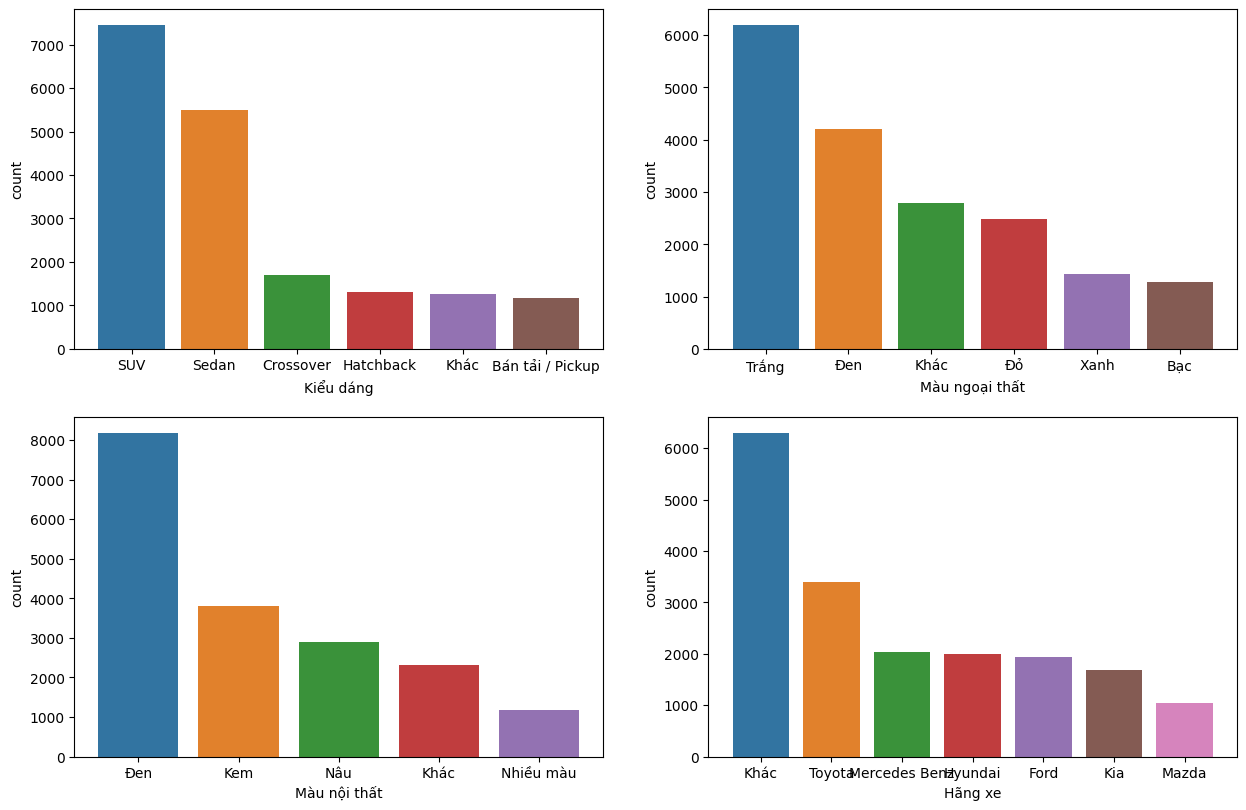

In [63]:
#plot price of each mau trong mau ngoai that
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical_col

#### Plot all categorical column

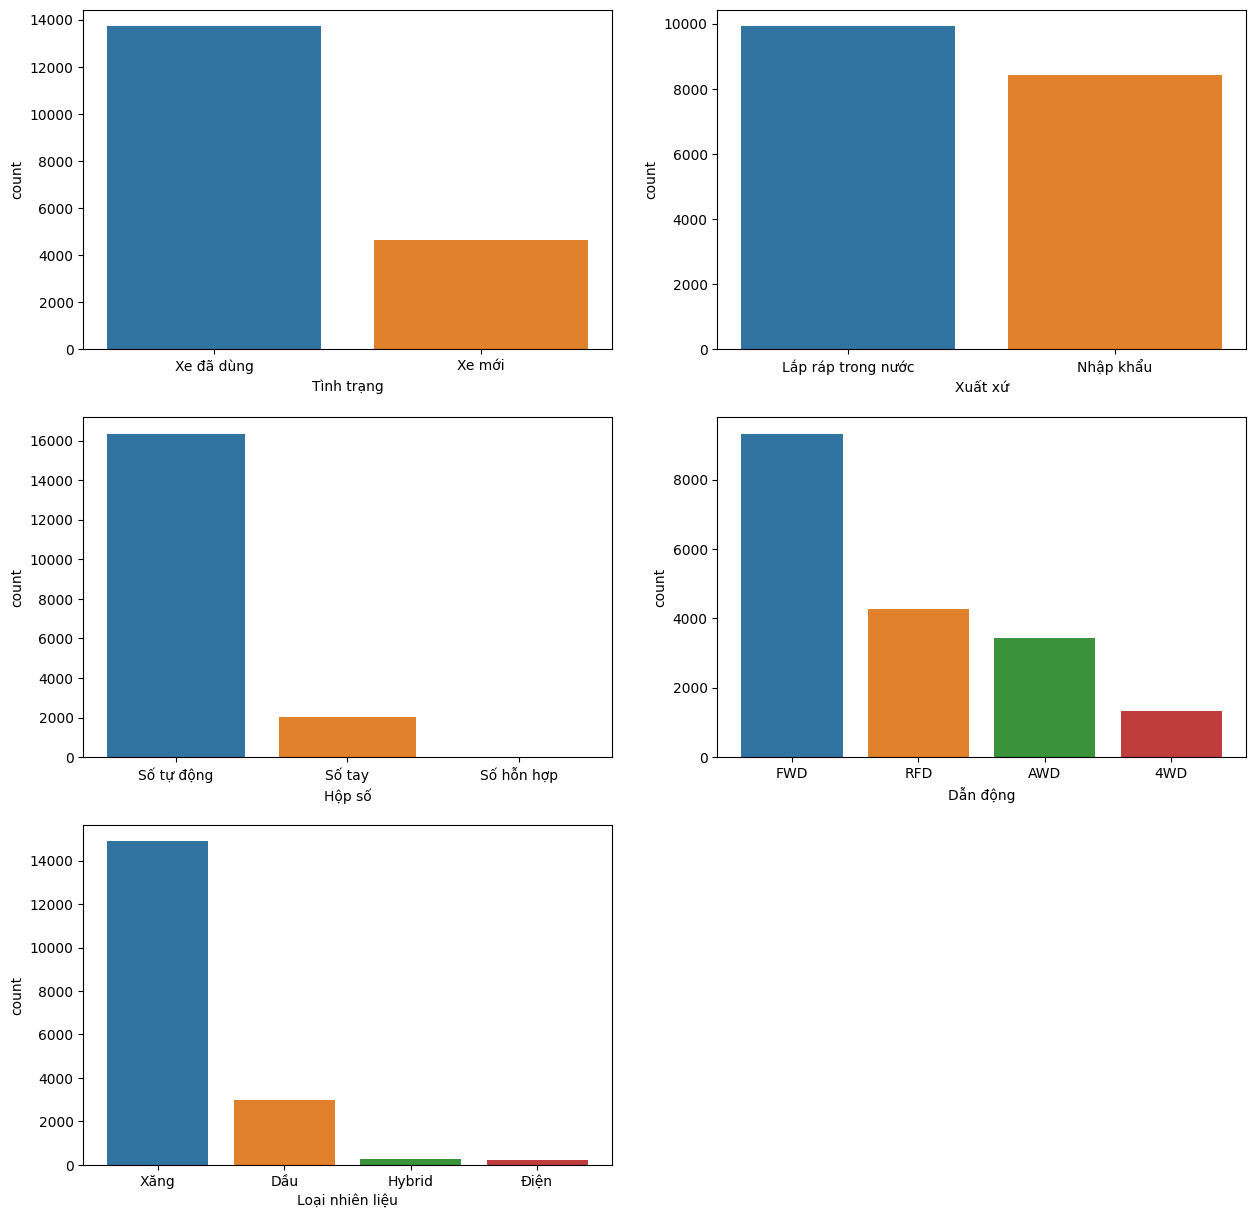

In [64]:
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,2,i+1)
    sns.countplot(x=feature[col], order=feature[col].value_counts().index)
    plt.plot()

## Modeling

#### Split dataset into train set and valid set 

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(feature, target, test_size=0.2, random_state=42)

#### Label Encoder for all string numerical columns

In [66]:
label_encoder = LabelEncoder()
for col in str_numerical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_valid[col] = label_encoder.transform(X_valid[col])

#### MinMax scaling for all not string numerical columns

In [70]:
min_max_scaler = MinMaxScaler()
for col in not_str_numerical_cols:
    X_train[col] = min_max_scaler.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_valid[col] = min_max_scaler.transform(np.array(X_valid[col]).reshape(-1,1))

#### Onehot Encoder for all categorical columns

In [71]:
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_valid = ct.transform(X_valid)

#### Fit model

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [73]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)
print('Mean Absolute Error Train:', mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error Valid:', mean_absolute_error(y_valid, y_pred_valid))

Mean Absolute Error Train: 887.1504011993776
Mean Absolute Error Valid: 893.9104390771353


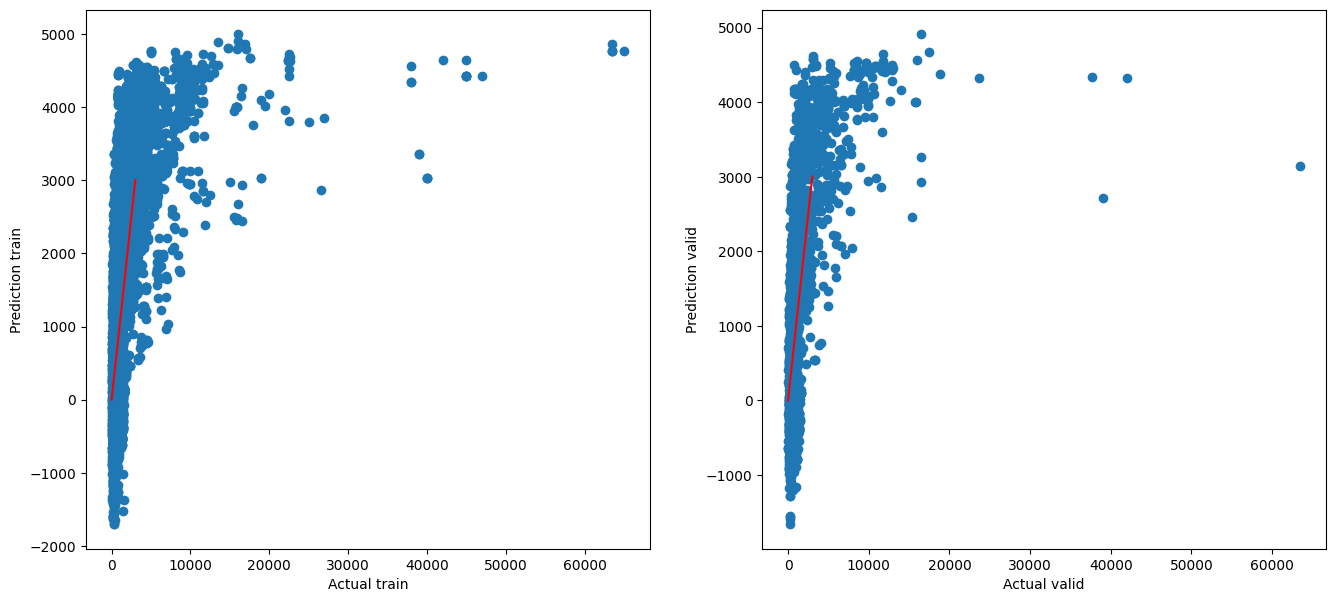

In [74]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train)
plt.plot([0, 3000], [0, 3000], 'r')
plt.xlabel('Actual train')
plt.ylabel('Prediction train')
plt.subplot(1,2,2)
plt.scatter(y_valid, y_pred_valid)
plt.plot([0, 3000], [0, 3000], 'r')
plt.xlabel('Actual valid')
plt.ylabel('Prediction valid')
plt.show()